In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',  encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Calculating the percentage of missing values if the dataset

df.isna().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
#Dropping the rows having the missing values as we are going to have enough data left

df = df.dropna(how = 'any', axis = 0)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#after dropping the rows with missing values. let us look at the shape of the dataset
df.shape

(406829, 8)

In [9]:
# we can observe that we successfully dropped all the rows having the missing values
df.isna().sum()/len(df)*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [10]:
#Let us have a look at the duplicate values in the dataset

print('=> There are {} duplicate values in the dataset'.format(df.duplicated().sum()))

=> There are 5225 duplicate values in the dataset


In [11]:
# dropping the duplicate values

df.drop_duplicates(inplace = True)
print(f'=> The remaining rows of the dataset after dropping missing and duplicate values : {len(df)}')

=> The remaining rows of the dataset after dropping missing and duplicate values : 401604


In [12]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Observe the minimum of 'Quantity' is negative. So, consider only positive values of the quantity as it will never be negative

In [14]:
df = df[df['Quantity']>0]
df.shape

(392732, 8)

In [15]:
#Adding new columns as total amount

df['TotalAmount'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [16]:
#Let us take only for a particular country

df = df[df['Country'] == 'United Kingdom'].reset_index(drop = True)
df.shape

(349227, 9)

### RFM Modeling Technique :




**Recency** : How much time has elapsed since a customer's last activity or transaction with the brand?.

**Frequency** : How often has a customer transacted or interacted with the brand during a particular period of time?.

**Monetary** : How much a customer has spent with the brand during a particular period of time?

In [17]:
# Now we should know the lastest transaction

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


'''.

==> Usage of Aggregate function.

example:-
data = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
                  
data.agg(func = 'mean', axis = 0)                
                  
Output:    =====>     A      ----- 4.0,

              B    5.0,
              
              C    6.0            
                  
'''

In [18]:
# latest trasaction date and time is : '2011-12-09 12:49:00'. So, we will set up the data as '2011-12-10' 

import datetime as dt

Recent_date = dt.datetime(2011,12,10)

data_for_RFM = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: int((Recent_date - x.max()).days) , 'InvoiceNo': 'count',
                                            'TotalAmount': 'sum'}).reset_index()

data_for_RFM.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
data_for_RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [19]:
data_for_RFM.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,89.065800,1857.950687
std,99.528532,214.022733,7477.736186
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,298.110000
50%,50.000000,40.000000,644.300000
75%,142.000000,98.000000,1570.810000
max,373.000000,7676.000000,259657.300000


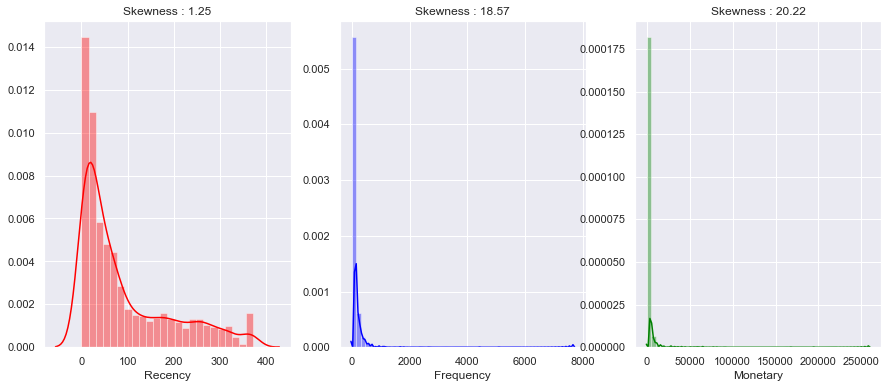

In [20]:
import seaborn as sns
sns.set()

fig, ax = plt.subplots(1,3, figsize = (15,6))
for col, ax, color in zip(['Recency','Frequency','Monetary'], ax, ['red','blue','green']):
    sns.distplot(data_for_RFM[col], ax = ax, color = color).set_title('Skewness ' + ': ' + round(data_for_RFM[col].skew(),2).astype(str))
    
    

**Observe that the features are highly skewed(right skewed)**

In [21]:
#Here, we will divide the data set into 4 parts based on the quantiles.

quantiles = data_for_RFM.drop('CustomerID',axis = 1).quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.10999999999996, 0.5: 644.3, 0.75: 1570.8099999999993}}

### Segmentation using R,F,M scores and will give the loyalty badges accordingly

In [22]:
#Creating the R,F and M scoring/segement function

#[1] Recency scoring (Negative Impact : Higher the value, less valuable) Meaning the most recently visited then the higher the score is.
def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
    
#[2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

#Scoring:
data_for_RFM['R_score'] = data_for_RFM['Recency'].apply(R_score,args = ('Recency',quantiles,))
data_for_RFM['F_score'] = data_for_RFM['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
data_for_RFM['M_score'] = data_for_RFM['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))

#Now we will create : RFMGroup and RFMScore
data_for_RFM['RFM_Group'] = data_for_RFM['R_score'].astype(str) + data_for_RFM['F_score'].astype(str) + data_for_RFM['M_score'].astype(str)

#Score
data_for_RFM['RFM_Score'] = data_for_RFM[['R_score','F_score','M_score']].sum(axis = 1)

#giving loyalty badge 
loyalty_level = ['True Lover','Flirting','Potential lover','Platonic Friend']
cuts = pd.qcut(data_for_RFM['RFM_Score'],q = 4,labels=loyalty_level)
data_for_RFM['RFM_Loyality_level'] = cuts.values


data_for_RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
0,12346.0,325,1,77183.60,4,4,1,441,9,Potential lover
1,12747.0,2,103,4196.01,1,1,1,111,3,True Lover
2,12748.0,0,4413,33053.19,1,1,1,111,3,True Lover
3,12749.0,3,199,4090.88,1,1,1,111,3,True Lover
4,12820.0,3,59,942.34,1,2,2,122,5,True Lover


## Visualization:

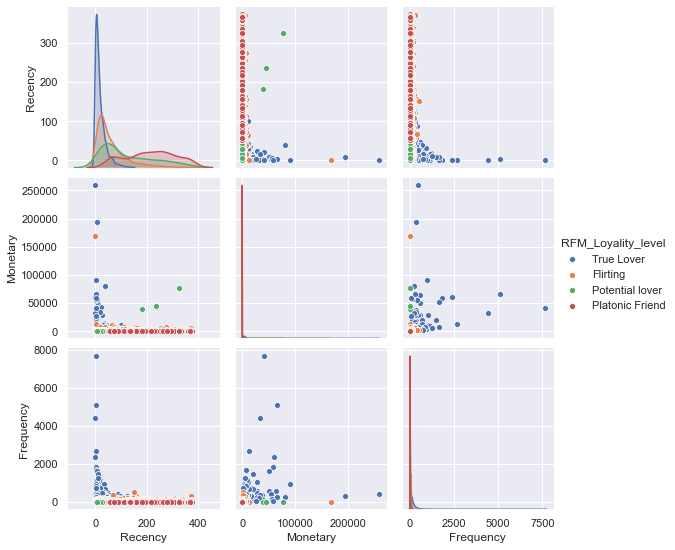

In [23]:
sns.pairplot(vars = ['Recency','Monetary','Frequency'], hue ='RFM_Loyality_level',data = data_for_RFM)

**We can observe it is not so clear so let us plot seperately**

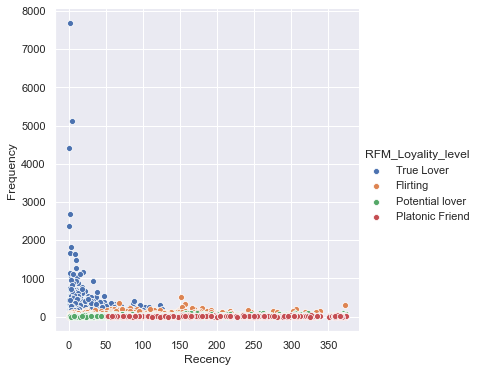

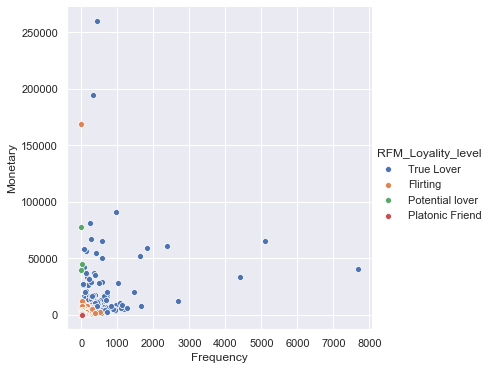

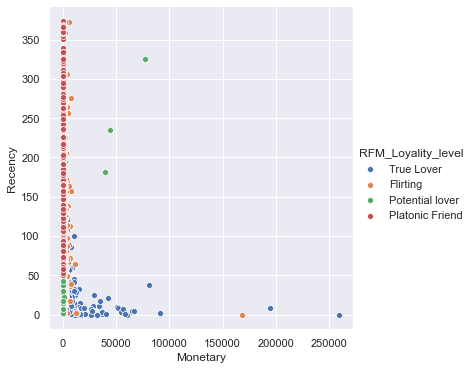

In [24]:
# Visualizing the recency, frequency, monetary with respect to loyalty badges

sns.pairplot(x_vars='Recency', y_vars='Frequency', hue = 'RFM_Loyality_level', data = data_for_RFM, height = 5)
sns.pairplot(x_vars='Frequency', y_vars='Monetary', hue = 'RFM_Loyality_level', data = data_for_RFM, height = 5)
sns.pairplot(x_vars='Monetary', y_vars='Recency', hue = 'RFM_Loyality_level', data = data_for_RFM, height = 5)

### K- means Clustering Model
Let us scale and prepare the data for K- means Clustering Model on 'Recency', 'Frequency', 'Monetary'

In [25]:
data_for_RFM.describe()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,89.065800,1857.950687,2.490436,2.516705,2.500383,7.507524
std,1576.823683,99.528532,214.022733,7477.736186,1.123257,1.127255,1.118291,2.823192
min,12346.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,14208.000000,17.000000,17.000000,298.110000,1.000000,2.000000,2.000000,5.000000
50%,15569.000000,50.000000,40.000000,644.300000,2.000000,3.000000,3.000000,8.000000
75%,16913.000000,142.000000,98.000000,1570.810000,3.000000,4.000000,4.000000,10.000000
max,18287.000000,373.000000,7676.000000,259657.300000,4.000000,4.000000,4.000000,12.000000


No negative values are present in the data

In [27]:
# But we saw the skewness of the data so zeros should be replaced by the small positives numbers

data_for_RFM['Recency'] = data_for_RFM['Recency'].apply(lambda x : 1 if x<=0 else x)
data_for_RFM['Monetary'] = data_for_RFM['Monetary'].apply(lambda x : 1 if x<=0 else x)

In [28]:
data_for_RFM.describe()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.729406,89.065800,1857.950942,2.490436,2.516705,2.500383,7.507524
std,1576.823683,99.521985,214.022733,7477.736122,1.123257,1.127255,1.118291,2.823192
min,12346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,14208.000000,17.000000,17.000000,298.110000,1.000000,2.000000,2.000000,5.000000
50%,15569.000000,50.000000,40.000000,644.300000,2.000000,3.000000,3.000000,8.000000
75%,16913.000000,142.000000,98.000000,1570.810000,3.000000,4.000000,4.000000,10.000000
max,18287.000000,373.000000,7676.000000,259657.300000,4.000000,4.000000,4.000000,12.000000


In [30]:
# Will treat the skewnwess by log transformations

log_data = data_for_RFM[['Recency','Monetary','Frequency']].apply(np.log, axis = 1).round(4)
log_data.head()

,Recency,Monetary,Frequency
0,5.7838,11.2539,0.0000
1,0.6931,8.3419,4.6347
2,0.0000,10.4059,8.3923
3,1.0986,8.3165,5.2933
4,1.0986,6.8484,4.0775


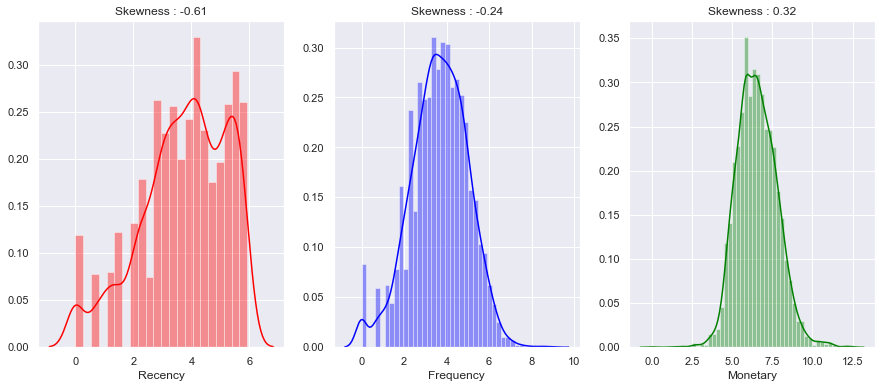

In [31]:
# after transformation let us visualize the columns

fig, ax = plt.subplots(1,3, figsize = (15,6))
for col, ax, color in zip(['Recency','Frequency','Monetary'], ax, ['red','blue','green']):
    sns.distplot(log_data[col], ax = ax, color = color).set_title('Skewness ' + ': ' + round(log_data[col].skew(),2).astype(str))
    

In [33]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(log_data)

scaled_RFMdata = pd.DataFrame(scaled_data, columns = log_data.columns, index = log_data.index)
scaled_RFMdata.head()

,Recency,Monetary,Frequency
0,1.389808,3.768516,-2.738854
1,-2.061134,1.442489,0.736633
2,-2.530981,3.091156,3.554397
3,-1.786249,1.422200,1.230506
4,-1.786249,0.249522,0.318798


Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

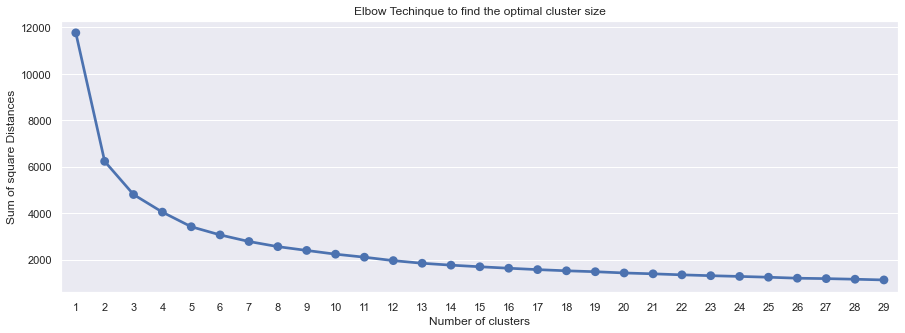

In [37]:
# finding optimal clusters using Elbow Method
from sklearn.cluster import KMeans

Sumofsquaredistance = {}
for k in range(1,30):
    mod = KMeans(n_clusters= k)
    mod = mod.fit(scaled_RFMdata)
    Sumofsquaredistance[k] = mod.inertia_

#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(Sumofsquaredistance.keys()), y = list(Sumofsquaredistance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

**As per Elbow method we can observe that at k = 3 the sum of squares is plummented**

In [39]:
model = KMeans(n_clusters= 3)
model = model.fit(scaled_RFMdata)

# Mapping on the data
data_for_RFM['Cluster'] = model.labels_
data_for_RFM['Cluster'] = 'Cluster' + data_for_RFM['Cluster'].astype(str)
data_for_RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level,Cluster
0,12346.0,325,1,77183.60,4,4,1,441,9,Potential lover,Cluster2
1,12747.0,2,103,4196.01,1,1,1,111,3,True Lover,Cluster1
2,12748.0,1,4413,33053.19,1,1,1,111,3,True Lover,Cluster1
3,12749.0,3,199,4090.88,1,1,1,111,3,True Lover,Cluster1
4,12820.0,3,59,942.34,1,2,2,122,5,True Lover,Cluster1


### Clustering is done and let us visualize the recency, frequency, monetary with respect to Clusters

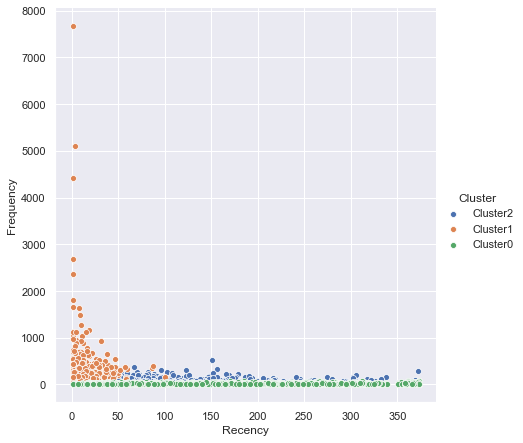

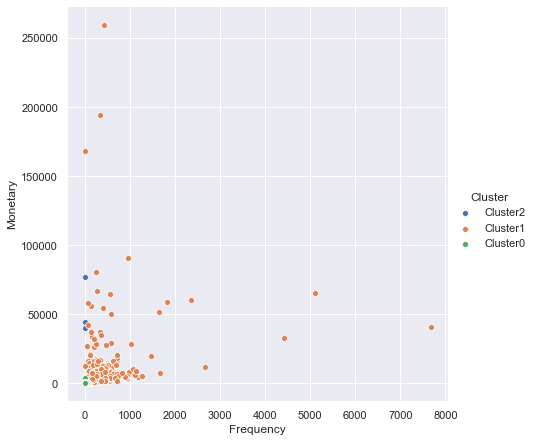

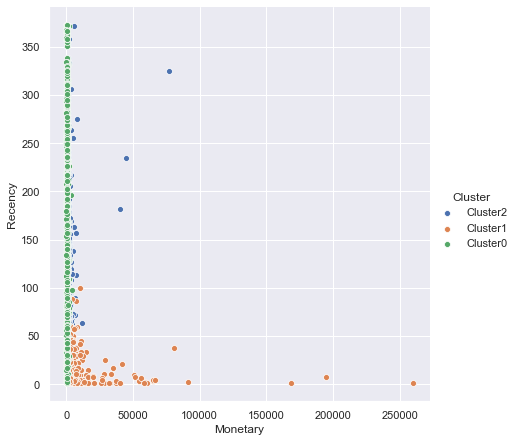

In [41]:
sns.pairplot(x_vars='Recency', y_vars='Frequency', hue = 'Cluster', data = data_for_RFM, height = 6)
sns.pairplot(x_vars='Frequency', y_vars='Monetary', hue = 'Cluster', data = data_for_RFM, height = 6)
sns.pairplot(x_vars='Monetary', y_vars='Recency', hue = 'Cluster', data = data_for_RFM, height = 6)